Denote $t_k$ as the $k$th column of $\mathbf{I}_K$, the $K\times K$ identity matrix, then a more simplistic viewpoint is to construct targets $t_k$ for each class. The response vector ($i$th row of $\mathbf{Y}$)

$$
y_i = t_k \text{ if } g_i = k.
$$
We might then fit the linear model by least squares: The criterion is a sum-of-squared Euclidean distances of the fitted vectors from their targets.

$$
\min_{\mathbf{B}} \sum_{i=1}^N \left\| y_i - \left[ (1,x_i^T)\mathbf{B} \right]^T \right\|^2.
$$
Then a new observation is classified by computing its fitted vector $\hat{f}(x)$ and classifying to the closest target:

$$
\hat{G}(x) = \arg\max_k \left\| \hat{f}(x)-t_k \right\|^2.
$$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Build simulation data

In [18]:
size = 300
mat_cov = np.eye(2)
cluster1 = np.random.multivariate_normal([-4,-4], mat_cov, size)
cluster2 = np.random.multivariate_normal([0,0], mat_cov, size)
cluster3 = np.random.multivariate_normal([4,4], mat_cov, size)
target1, target2, target3 = np.eye(3)
mat_x0 = np.concatenate((cluster1, cluster2, cluster3))
mat_x = np.hstack((np.ones((size*3, 1)), mat_x0))
mat_y = np.vstack((np.tile(target1, (size,1)),
                   np.tile(target2, (size,1)),
                   np.tile(target3, (size,1))))


In [20]:
mat_x

array([[ 1.        , -3.83798961, -3.17293632],
       [ 1.        , -5.21213984, -5.67686347],
       [ 1.        , -4.58283649, -3.82624305],
       ...,
       [ 1.        ,  4.55774804,  3.81407212],
       [ 1.        ,  3.37494523,  4.9963007 ],
       [ 1.        ,  3.52161258,  4.95818875]])

In [21]:
mat_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

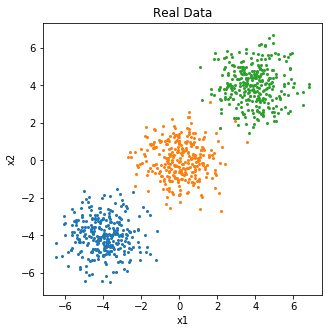

In [24]:
fig1 = plt.figure(0, figsize = (5,5))
fig1.clear()
ax = fig1.add_subplot(1,1,1)
ax.plot(cluster1[:,0], cluster1[:,1], 'o', color = 'C0', markersize=2)
ax.plot(cluster2[:,0], cluster2[:,1], 'o', color = 'C1', markersize=2)
ax.plot(cluster3[:,0], cluster3[:,1], 'o', color = 'C2', markersize=2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title("Real Data")
plt.show()

## Multiple Linear Regression on mat_y

In [26]:
mat_beta = np.linalg.solve(np.matmul(np.transpose(mat_x), mat_x), np.matmul(np.transpose(mat_x), mat_y))
mat_beta

array([[ 0.33339681,  0.33341799,  0.33318519],
       [-0.0607427 ,  0.00621277,  0.05452993],
       [-0.05984267, -0.00494572,  0.06478839]])

## Classify train data

In [28]:
mat_y_hat = np.matmul(mat_x, mat_beta)
mat_y_hat

array([[ 0.75640364,  0.32526591, -0.08166955],
       [ 0.98971493,  0.32911235, -0.31882728],
       [ 0.84074327,  0.32386942, -0.16461269],
       ...,
       [-0.17169737,  0.3428709 ,  0.82882647],
       [-0.17059845,  0.32967545,  0.84092301],
       [-0.1772267 ,  0.33077515,  0.84645155]])

In [29]:
idx_classified_y = mat_y_hat.argmax(axis=1)
idx_classified_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,

In [30]:
classified_cluster1 = mat_x0[idx_classified_y == 0]
classified_cluster2 = mat_x0[idx_classified_y == 1]
classified_cluster3 = mat_x0[idx_classified_y == 2]

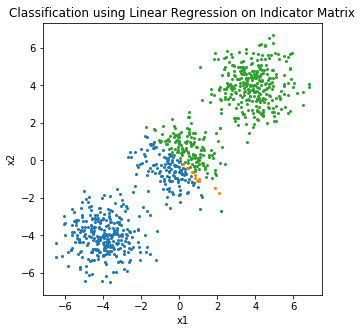

In [32]:
fig2 = plt.figure(1, figsize=(5,5))
ax = fig2.add_subplot(1,1,1)
ax.plot(classified_cluster1[:,0], classified_cluster1[:,1], 'o', color='C0', markersize=2)
ax.plot(classified_cluster2[:,0], classified_cluster2[:,1], 'o', color='C1', markersize=2)
ax.plot(classified_cluster3[:,0], classified_cluster3[:,1], 'o', color='C2', markersize=2)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_title('Classification using Linear Regression on Indicator Matrix')
plt.show()

As we can see that cluster 2 is almost completely masked.

## Look into details of this classification

Let's show the linear regression values for each class of y_hat and see who is dominating. <br>
First we project the data into the centriods line and make it an 1-d data. (Here we make new data instead.)

In [41]:
size = 300
cluster1 = np.random.normal(-4, size=(size, 1))
cluster2 = np.random.normal(0, size=(size, 1))
cluster3 = np.random.normal(4, size=(size, 1))
target1, target2, target3 = np.eye(3)
mat_x0 = np.concatenate((cluster1, cluster2, cluster3))
mat_x = np.hstack((np.ones((size*3, 1)), mat_x0))
mat_y = np.vstack((np.tile(target1, (size,1)),
                   np.tile(target2, (size,1)),
                   np.tile(target3, (size,1))))

mat_beta = np.linalg.solve(np.matmul(np.transpose(mat_x), mat_x), np.matmul(np.transpose(mat_x), mat_y))
mat_y_hat = np.matmul(mat_x, mat_beta)
idx_classified_y = mat_y_hat.argmax(axis=1)

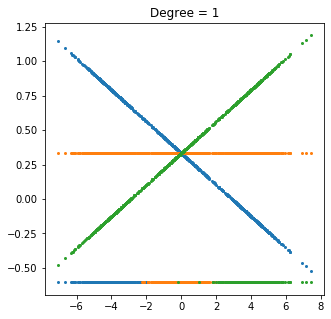

In [47]:
fig3 = plt.figure(2, figsize=(5, 5))
ax = fig3.add_subplot(1, 1, 1)
ax.plot(mat_x0, mat_y_hat[:, 0], 'o', color='C0', markersize=2)
ax.plot(mat_x0, mat_y_hat[:, 1], 'o', color='C1', markersize=2)
ax.plot(mat_x0, mat_y_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax.get_ylim()
ax.plot(cluster1, [y_floor]*size, 'o', color='C0', markersize=2)
ax.plot(cluster2, [y_floor]*size, 'o', color='C1', markersize=2)
ax.plot(cluster3, [y_floor]*size, 'o', color='C2', markersize=2)
ax.set_title('Degree = 1')
plt.show()

As we can see, the second (orange) class is almost never dominating. 

### If we do a 2-D linear regression, bringing in x-square

In [48]:
mat_x2 = np.hstack((mat_x, mat_x0*mat_x0))
mat_beta2 = np.linalg.solve(np.matmul(np.transpose(mat_x2), mat_x2), np.matmul(np.transpose(mat_x2), mat_y))
mat_y2_hat = np.matmul(mat_x2, mat_beta2)

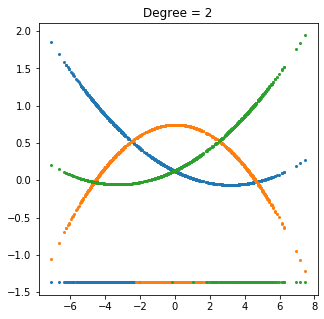

In [49]:
fig4 = plt.figure(3, figsize=(5, 5))
ax = fig4.add_subplot(1, 1, 1)
ax.plot(mat_x0, mat_y2_hat[:, 0], 'o', color='C0', markersize=2)
ax.plot(mat_x0, mat_y2_hat[:, 1], 'o', color='C1', markersize=2)
ax.plot(mat_x0, mat_y2_hat[:, 2], 'o', color='C2', markersize=2)
y_floor, _ = ax.get_ylim()
ax.plot(cluster1, [y_floor]*size, 'o', color='C0', markersize=2)
ax.plot(cluster2, [y_floor]*size, 'o', color='C1', markersize=2)
ax.plot(cluster3, [y_floor]*size, 'o', color='C2', markersize=2)
ax.set_title('Degree = 2')
plt.show()

For this simple example a quadratic rather than linear fit would solve the problem. However, if there were 4 classes, a quadratic would not come down fast enough, and a cubic would be needed as well. A loose but general rule is that if $K\ge 3$ classes are lined up, polynomial terms up to degree $K-1$ might be needed to resolve them.

Note also that these are polynomials along the derived direction passing through the centroids, which can have orbitrary orientation. So in $p$-dimensional input space, one would need general polynomial terms and cross-products of total degree $K-1$, $O(p^{K-1})$ terms in all, to resolve such worst-case scenarios.

The example is extreme, but for large $K$ and small $p$ such maskings natrually occur.